#### Import required libraries

In [25]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [26]:
from ipynb.fs.defs.exploratory_visualization_ini import create_weighted_avgs

In [27]:
plot_vars_counts = ['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
               'drug_tot_arrests', 'disorder_arrests_tot_index']

plot_vars_dm_counts = ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count', 'dm_jail_occupancy_count',
               'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']

plot_vars_dm_rates = ['dm_violent_crime_rate', 'dm_total_officers_rate', 'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
               'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']

plot_vars_rates = ['violent_crime_rate', 'total_officers_rate', 'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
               'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate']

## Define years for ticks
Years_90_02 =[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
Years_03_15 = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

## Define years for ticks
Years =[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
xtick_years = [1990, 1995, 2000, 2005, 2010, 2015]

#### Load in required datasets

In [7]:
#### FINAL
## counts
fnl_mn_large = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_large_cities_core_counts.csv')
fnl_mn_med = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_medium_cities_core_counts.csv')
fnl_mn_sml = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_small_cities_core_counts.csv')

## rates
fnl_mn_large_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_large_cities_core_rates.csv')
fnl_mn_med_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_medium_cities_core_rates.csv')
fnl_mn_sml_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_small_cities_core_rates.csv')


####DEMEANED
## counts
fnl_large_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_counts_dm.csv')
fnl_medium_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_medium_cities_core_counts_dm.csv')
fnl_small_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_small_cities_core_counts_dm.csv')

## rates
fnl_large_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_rates_dm.csv')
fnl_medium_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_medium_cities_core_rates_dm.csv')
fnl_small_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_small_cities_core_rates_dm.csv')

FileNotFoundError: [Errno 2] File /Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_counts_dm.csv does not exist: '/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_counts_dm.csv'

In [28]:
### to get dependent var plot on 1st row and reqd ind vars plots one below other next
### each var for all 3 dfs plotted horizontally one by one var

def mult_var_plots_mult_rows(req_dfs, groupby_var, x_var, y_var_list, x_label, 
                            y_label_lst, plt_titles, fig_title, weighted=None, weights_var=None, xtick_years=xtick_years):
    fig, axs = plt.subplots(nrows=len(y_var_list), ncols=len(req_dfs), figsize=(20, 24), constrained_layout=True)
    
    row_count = 0
    for rw in range(len(y_var_list)):
        col_count = 0 ## to keep track of dataframe being iterated from the req_dfs list and also for col position on a given row
        for req_df in req_dfs:
            y_var = y_var_list[rw]
            if weighted:
                axs[rw, col_count].plot(x_var, req_df.groupby(f'{groupby_var}').apply(create_weighted_avgs, f'{y_var}', f'{weights_var}'), label=y_var)
            else:
                axs[rw, col_count].plot(x_var, req_df.groupby(f'{groupby_var}')[f'{y_var}'].mean(), label=y_var)
            
            axs[0, col_count].set_title(plt_titles[col_count], fontsize=20)
            
            axs[row_count, col_count].set_xticks(xtick_years) 
            axs[row_count, col_count].set_xticklabels(xtick_years, fontsize=11, rotation=45)
            
            col_count += 1
            
        axs[row_count,0].set_ylabel(y_label_lst[row_count], fontsize=20)
        
        row_count += 1

    fig.suptitle(fig_title, fontsize=20)

#### Final - Violent Crime vs Other Core Vars

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_mn_large, fnl_mn_med, fnl_mn_sml],
                                               groupby_var='YEAR',
                                               y_var_list = ['violent_crime', 'total_officers', 
                                                             'prison_occupancy_count', 'jail_occupancy_count',
                                                             'drug_tot_arrests', 'disorder_arrests_tot_index'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'COUNTS')

#### Demeaned - Violent Crime vs Other Core Vars

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_counts_dm, fnl_medium_core_counts_dm, fnl_small_core_counts_dm],
                                               groupby_var='YEAR',
                                               y_var_list = ['dm_violent_crime', 'dm_total_officers', 
                                                             'dm_prison_occupancy_count', 'dm_jail_occupancy_count',
                                                             'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED COUNTS')

#### Final - Violent Crime vs Other Core Vars - Rates

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_mn_large_rates, fnl_mn_med_rates, fnl_mn_sml_rates],
                                               groupby_var='YEAR',
                                               y_var_list = ['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'RATES')

#### Demeaned - Violent Crime vs Other Core Vars - Rates

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_rates_dm, fnl_medium_core_rates_dm, fnl_small_core_rates_dm],
                                               groupby_var='YEAR',
                                               y_var_list = ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate'],
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED RATES')

### CORRELATION MATRIX

In [ ]:
def generate_corr_heatmaps_multiple(req_dfs, var_list, fig_title):
    sns.set(font_scale=1.8)
    fig, ax =plt.subplots(1,len(req_dfs), figsize=(30, 8))
    fig.subplots_adjust(wspace=0.5)

    count = 0
    for df in req_dfs:
        var_corr = df.loc[:, var_list[count]].corr()
        # plot the heatmap and annotation on it
        sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, 
                    annot=True, cmap='Greens', ax=ax[count])
        count += 1
    fig.suptitle(fig_title, fontsize=24)

#### Large - Violent Crime vs Core Vars - Counts and Demeaned Counts 

In [ ]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_large, fnl_large_core_counts_dm],
                                var_list = [['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
                                  'drug_tot_arrests', 'disorder_arrests_tot_index'], 
                                 ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count',
                                  'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']],
                                fig_title='LARGE AGENCIES - CORRELATIONS - COUNTS, DEMEANED COUNTS')

#### Medium - Violent Crime vs Core Vars - Counts and Demeaned Counts 

In [ ]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_med, fnl_medium_core_counts_dm],
                                var_list = [['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
                                  'drug_tot_arrests', 'disorder_arrests_tot_index'], 
                                 ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count',
                                  'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']],
                               fig_title='MEDIUM AGENCIES - CORRELATIONS - COUNTS, DEMEANED COUNTS')

#### Small - Violent Crime vs Core Vars - Counts and Demeaned Counts 

In [ ]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_sml, fnl_small_core_counts_dm],
                                var_list = [['violent_crime', 'total_officers', 'prison_occupancy_count', 'jail_occupancy_count',
                                  'drug_tot_arrests', 'disorder_arrests_tot_index'], 
                                 ['dm_violent_crime', 'dm_total_officers', 'dm_prison_occupancy_count',
                                  'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']],
                               fig_title='SMALL AGENCIES - CORRELATIONS - COUNTS, DEMEANED COUNTS')

#### Large - Violent Crime vs Core Vars - Rates and Demeaned Rates

In [ ]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_large_rates, fnl_large_core_rates_dm],
                                var_list = [['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'], 
                                 ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']],
                                fig_title='LARGE AGENCIES - CORRELATIONS - RATES, DEMEANED RATES')

#### Medium - Violent Crime vs Core Vars - Rates and Demeaned Rates

In [ ]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_med_rates, fnl_medium_core_rates_dm],
                                var_list = [['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'], 
                                 ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']],
                                fig_title='MEDIUM AGENCIES - CORRELATIONS - RATES, DEMEANED RATES')

#### Small - Violent Crime vs Core Vars - Rates and Demeaned Rates

In [ ]:
generate_corr_heatmaps_multiple(req_dfs=[fnl_mn_sml_rates, fnl_small_core_rates_dm],
                                var_list = [['violent_crime_rate', 'total_officers_rate', 
                                                             'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                                                             'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate'], 
                                 ['dm_violent_crime_rate', 'dm_total_officers_rate', 
                                                             'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
                                                             'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']],
                                fig_title='SMALL AGENCIES - CORRELATIONS - RATES, DEMEANED RATES')

In [ ]:
## rates - all
fnl_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_gte_10k_core_rates_dm_1990_2002.csv')
fnl_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_gte_10k_core_rates_dm_2003_2015.csv')

## rates by agencies
fnl_large_core_dm_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_large_cities_core_rates_dm_1990_2002.csv')
fnl_medium_core_dm_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_medium_cities_core_rates_dm_1990_2002.csv')
fnl_small_core_dm_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_small_cities_core_rates_dm_1990_2002.csv')

fnl_large_core_dm_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_large_cities_core_rates_dm_2003_2015.csv')
fnl_medium_core_dm_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_medium_cities_core_rates_dm_2003_2015.csv')
fnl_small_core_dm_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_small_cities_core_rates_dm_2003_2015.csv')

## original rates by agencies
fnl_large_core_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02/final_main_large_cities_core_rates_1990_2002.csv')
fnl_medium_core_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02/final_main_medium_cities_core_rates_1990_2002.csv')
fnl_small_core_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02/final_main_small_cities_core_rates_1990_2002.csv')

fnl_large_core_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15/final_main_large_cities_core_rates_2003_2015.csv')
fnl_medium_core_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15/final_main_medium_cities_core_rates_2003_2015.csv')
fnl_small_core_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15/final_main_small_cities_core_rates_2003_2015.csv')

#### Demeaned Rates 90-02

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_rates_90_02, fnl_medium_core_dm_rates_90_02, fnl_small_core_dm_rates_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_rates,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED RATES 90-02')

#### Demeaned Rates 03-15

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_rates_03_15, fnl_medium_core_dm_rates_03_15, fnl_small_core_dm_rates_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_rates,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED RATES 03_15')

#### Rates 90-02

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_rates_90_02, fnl_medium_core_rates_90_02, fnl_small_core_rates_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_rates,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'RATES 90-02')

#### Rates 03-15

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_rates_03_15, fnl_medium_core_rates_03_15, fnl_small_core_rates_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_rates,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'RATES 03_15')

In [ ]:
## counts - all
fnl_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_gte_10k_core_counts_dm_1990_2002.csv')
fnl_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_gte_10k_core_counts_dm_2003_2015.csv')

## counts by agencies
fnl_large_core_dm_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_large_cities_core_counts_dm_1990_2002.csv')
fnl_medium_core_dm_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_medium_cities_core_counts_dm_1990_2002.csv')
fnl_small_core_dm_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_90_02/final_main_small_cities_core_counts_dm_1990_2002.csv')

fnl_large_core_dm_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_large_cities_core_counts_dm_2003_2015.csv')
fnl_medium_core_dm_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_medium_cities_core_counts_dm_2003_2015.csv')
fnl_small_core_dm_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_03_15/final_main_small_cities_core_counts_dm_2003_2015.csv')

## original counts by agencies
fnl_large_core_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02/final_main_large_cities_core_counts_1990_2002.csv')
fnl_medium_core_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02/final_main_medium_cities_core_counts_1990_2002.csv')
fnl_small_core_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02/final_main_small_cities_core_counts_1990_2002.csv')

fnl_large_core_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15/final_main_large_cities_core_counts_2003_2015.csv')
fnl_medium_core_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15/final_main_medium_cities_core_counts_2003_2015.csv')
fnl_small_core_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15/final_main_small_cities_core_counts_2003_2015.csv')

#### Demeaned Counts 03-15

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_counts_03_15, fnl_medium_core_dm_counts_03_15, fnl_small_core_dm_counts_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_counts,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED COUNTS 03_15')

#### Counts 03-15

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_counts_03_15, fnl_medium_core_counts_03_15, fnl_small_core_counts_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_counts,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'COUNTS 03_15')

#### Demeaned Counts 90-02

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_counts_90_02, fnl_medium_core_dm_counts_90_02, fnl_small_core_dm_counts_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_counts,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'DEMEANED COUNTS 90_02')

#### Counts 90-02

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_counts_90_02, fnl_medium_core_counts_90_02, fnl_small_core_counts_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_counts,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'COUNTS 90_02')

#### Weighted Demeaned Counts -  90-02

In [ ]:
fnl_large_core_dm_ref_pop_wtd_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_90_02/final_main_large_cities_core_counts_dm_1990_2002_ref_pop.csv')
fnl_medium_core_dm_ref_pop_wtd_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_90_02/final_main_medium_cities_core_counts_dm_1990_2002_ref_pop.csv')
fnl_small_core_dm_ref_pop_wtd_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_90_02/final_main_small_cities_core_counts_dm_1990_2002_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_ref_pop_wtd_counts_90_02, fnl_medium_core_dm_ref_pop_wtd_counts_90_02, fnl_small_core_dm_ref_pop_wtd_counts_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_counts,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED DEMEANED COUNTS 90-02',
                        weighted=True,
                        weights_var='fnl_population_wt')

#### Weighted Demeaned Counts -  03-15

In [ ]:
fnl_large_core_dm_ref_pop_wtd_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_03_15/final_main_large_cities_core_counts_dm_2003_2015_ref_pop.csv')
fnl_medium_core_dm_ref_pop_wtd_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_03_15/final_main_medium_cities_core_counts_dm_2003_2015_ref_pop.csv')
fnl_small_core_dm_ref_pop_wtd_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_03_15/final_main_small_cities_core_counts_dm_2003_2015_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_ref_pop_wtd_counts_03_15, fnl_medium_core_dm_ref_pop_wtd_counts_03_15, fnl_small_core_dm_ref_pop_wtd_counts_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_counts,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED DEMEANED COUNTS 03_15',
                        weighted=True,
                        weights_var='fnl_population_wt')

#### Weighted Demeaned Rates 90-02

In [ ]:
fnl_large_core_dm_ref_pop_wtd_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_03_15/final_main_large_cities_core_rates_dm_2003_2015_ref_pop.csv')
fnl_medium_core_dm_ref_pop_wtd_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_03_15/final_main_medium_cities_core_rates_dm_2003_2015_ref_pop.csv')
fnl_small_core_dm_ref_pop_wtd_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_dm_pop_ref_03_15/final_main_small_cities_core_rates_dm_2003_2015_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_ref_pop_wtd_rates_90_02, fnl_medium_core_dm_ref_pop_wtd_rates_90_02, fnl_small_core_dm_ref_pop_wtd_rates_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_rates,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED DEMEANED RATES 90-02',
                        weighted=True,
                        weights_var='fnl_population_wt')

#### Weighted Demeaned Rates 03-15

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_dm_ref_pop_wtd_rates_03_15, fnl_medium_core_dm_ref_pop_wtd_rates_03_15, fnl_small_core_dm_ref_pop_wtd_rates_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_dm_rates,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED DEMEANED RATES 03_15',
                        weighted=True,
                        weights_var='fnl_population_wt')

#### Weighted Counts -  90-02

In [ ]:
fnl_large_core_ref_pop_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_90_02/final_main_large_cities_core_counts_1990_2002_ref_pop.csv')
fnl_medium_core_ref_pop_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_90_02/final_main_medium_cities_core_counts_1990_2002_ref_pop.csv')
fnl_small_core_ref_pop_counts_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_90_02/final_main_small_cities_core_counts_1990_2002_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_ref_pop_counts_90_02, fnl_medium_core_ref_pop_counts_90_02, fnl_small_core_ref_pop_counts_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_counts,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED COUNTS 90-02',
                        weighted=True,
                        weights_var='population_wt')

#### Weighted Counts -  03-15

In [ ]:
fnl_large_core_ref_pop_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_03_15/final_main_large_cities_core_counts_2003_2015_ref_pop.csv')
fnl_medium_core_ref_pop_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_03_15/final_main_medium_cities_core_counts_2003_2015_ref_pop.csv')
fnl_small_core_ref_pop_counts_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_03_15/final_main_small_cities_core_counts_2003_2015_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_ref_pop_counts_03_15, fnl_medium_core_ref_pop_counts_03_15, fnl_small_core_ref_pop_counts_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_counts,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED COUNTS 03_15',
                        weighted=True,
                        weights_var='population_wt')

#### Weighted Rates -  90-02

In [ ]:
fnl_large_core_ref_pop_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_90_02/final_main_large_cities_core_rates_1990_2002_ref_pop.csv')
fnl_medium_core_ref_pop_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_90_02/final_main_medium_cities_core_rates_1990_2002_ref_pop.csv')
fnl_small_core_ref_pop_rates_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_90_02/final_main_small_cities_core_rates_1990_2002_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_ref_pop_rates_90_02, fnl_medium_core_ref_pop_rates_90_02, fnl_small_core_ref_pop_rates_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_rates,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED RATES 90-02',
                        weighted=True,
                        weights_var='population_wt')

#### Weighted Rates -  03-15

In [ ]:
fnl_large_core_ref_pop_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_03_15/final_main_large_cities_core_rates_2003_2015_ref_pop.csv')
fnl_medium_core_ref_pop_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_03_15/final_main_medium_cities_core_rates_2003_2015_ref_pop.csv')
fnl_small_core_ref_pop_rates_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pop_ref_03_15/final_main_small_cities_core_rates_2003_2015_ref_pop.csv')

In [ ]:
mult_var_plots_mult_rows(req_dfs=[fnl_large_core_ref_pop_rates_03_15, fnl_medium_core_ref_pop_rates_03_15, fnl_small_core_ref_pop_rates_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = plot_vars_rates,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'WEIGHTED RATES 03_15',
                        weighted=True,
                        weights_var='population_wt')

### Percentage Changes

In [145]:
vars_rates_pc = ['pc_violent_crime_rate', 'pc_total_officers_rate', 'pc_prison_occupancy_count_rate', 'pc_jail_occupancy_count_rate',
               'pc_drug_tot_arrests_rate', 'pc_disorder_arrests_tot_index_rate']
vars_counts_pc = ['pc_violent_crime', 'pc_total_officers', 'pc_prison_occupancy_count', 'pc_jail_occupancy_count', 'pc_drug_tot_arrests','pc_disorder_arrests_tot_index']

#### pc for all

In [146]:
large_all = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pc/final_main_large_cities_core_counts_pc.csv')
medium_all = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pc/final_main_medium_cities_core_counts_pc.csv')
small_all = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pc/final_main_small_cities_core_counts_pc.csv')

print(list(large_all))

['ORI', 'YEAR', 'AGENCY', 'placename', 'population', 'pc_violent_crime', 'pc_total_officers', 'pc_prison_occupancy_count', 'pc_jail_occupancy_count', 'pc_drug_tot_arrests', 'pc_disorder_arrests_tot_index']


In [147]:
large_all.groupby('YEAR').aggregate({'pc_violent_crime': np.mean, 'pc_total_officers': np.mean})

,pc_violent_crime,pc_total_officers
YEAR,,
1990,3.827169,32.435822
1991,3.845112,31.135408
1992,3.696676,30.650339
1993,3.648231,31.571326
1994,3.137876,33.152960
1995,2.112405,32.182670
1996,3.486020,35.185894
1997,6.162571,29.289809
1998,4.337886,28.481716


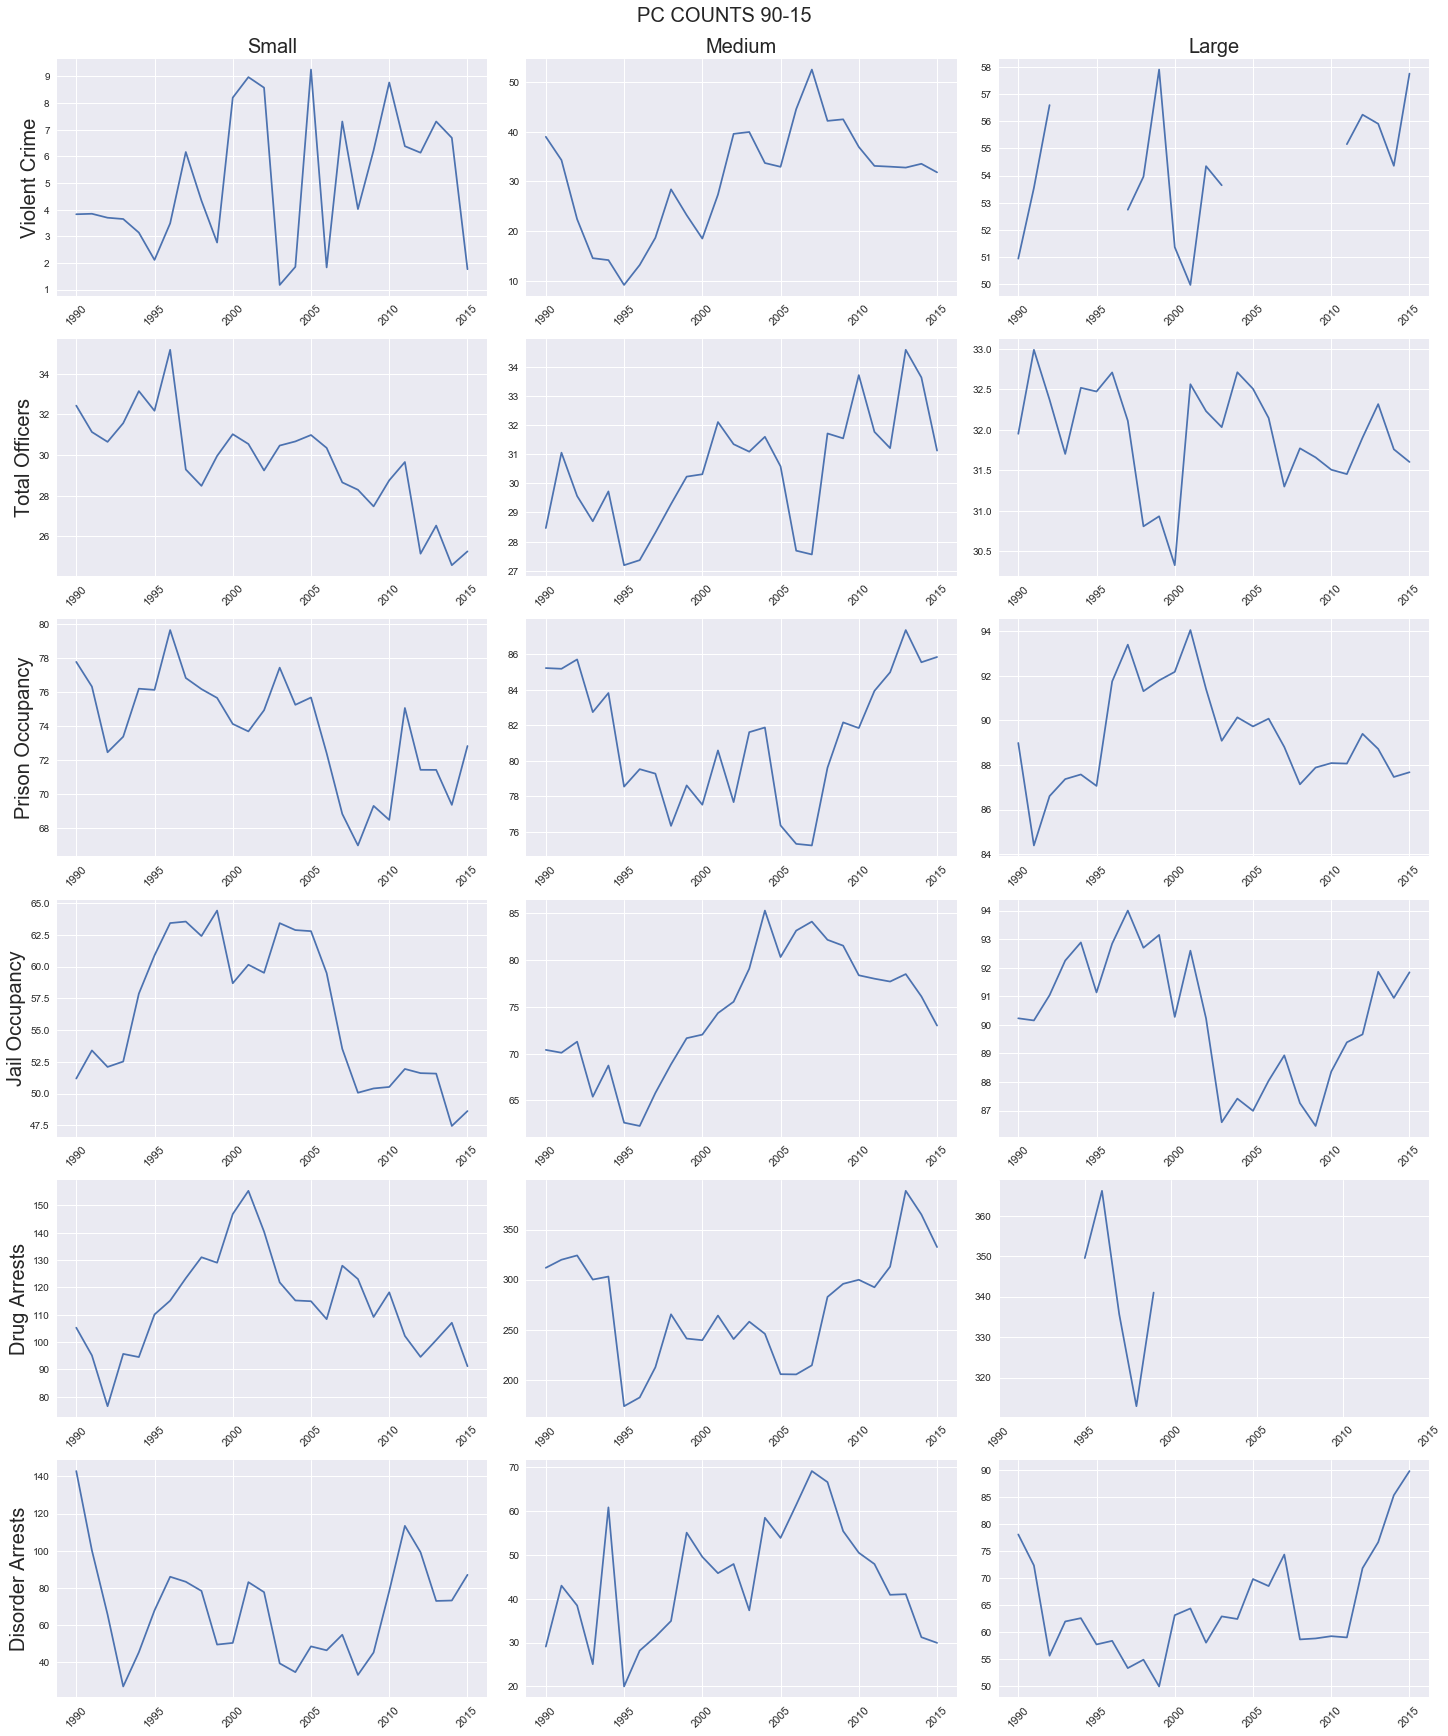

In [40]:
mult_var_plots_mult_rows(req_dfs=[large_all, medium_all, small_all],
                                               groupby_var='YEAR',
                                               y_var_list = vars_counts_pc,
                                               x_var = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'PC COUNTS 90-15')

#### pc for 90_02

In [41]:
large_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02_pc/final_main_large_cities_core_counts_1990_2002_pc.csv')
medium_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02_pc/final_main_medium_cities_core_counts_1990_2002_pc.csv')
small_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02_pc/final_main_small_cities_core_counts_1990_2002_pc.csv')

In [42]:
large_90_02.groupby('YEAR').aggregate({'pc_violent_crime': np.mean, 'pc_total_officers': np.mean})

,pc_violent_crime,pc_total_officers
YEAR,,
1990,7.147891,23.092613
1991,15.229534,22.844259
1992,11.790133,19.760059
1993,7.507945,20.406954
1994,11.980173,20.645263
1995,6.690937,20.354227
1996,6.459158,24.483864
1997,8.307971,17.148382
1998,3.768479,17.961936


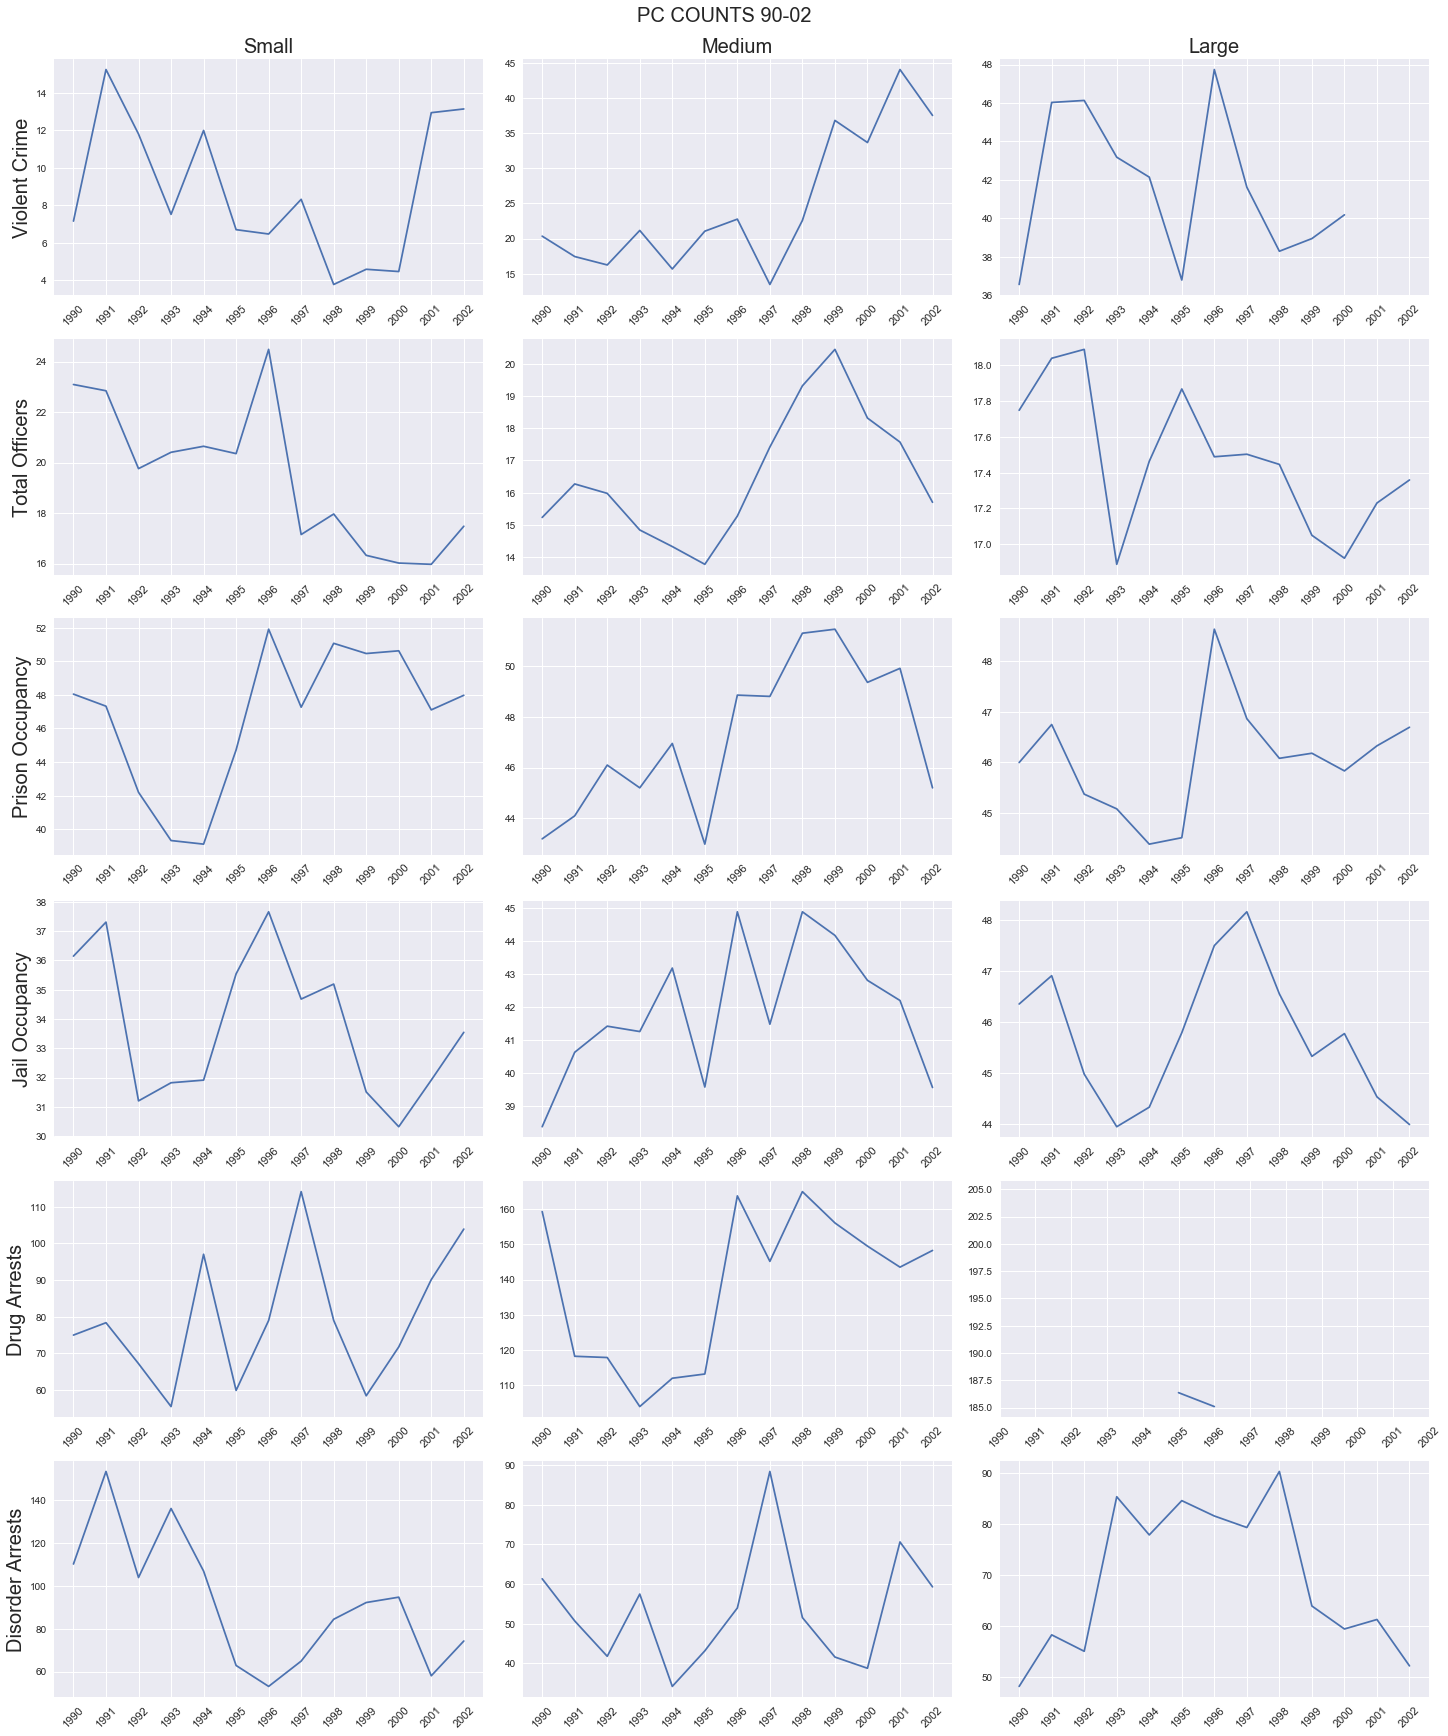

In [43]:
mult_var_plots_mult_rows(req_dfs=[large_90_02, medium_90_02, small_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = vars_counts_pc,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'PC COUNTS 90-02')

#### pc for 03_15

In [45]:
large_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15_pc/final_main_large_cities_core_counts_2003_2015_pc.csv')
medium_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15_pc/final_main_medium_cities_core_counts_2003_2015_pc.csv')
small_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15_pc/final_main_small_cities_core_counts_2003_2015_pc.csv')

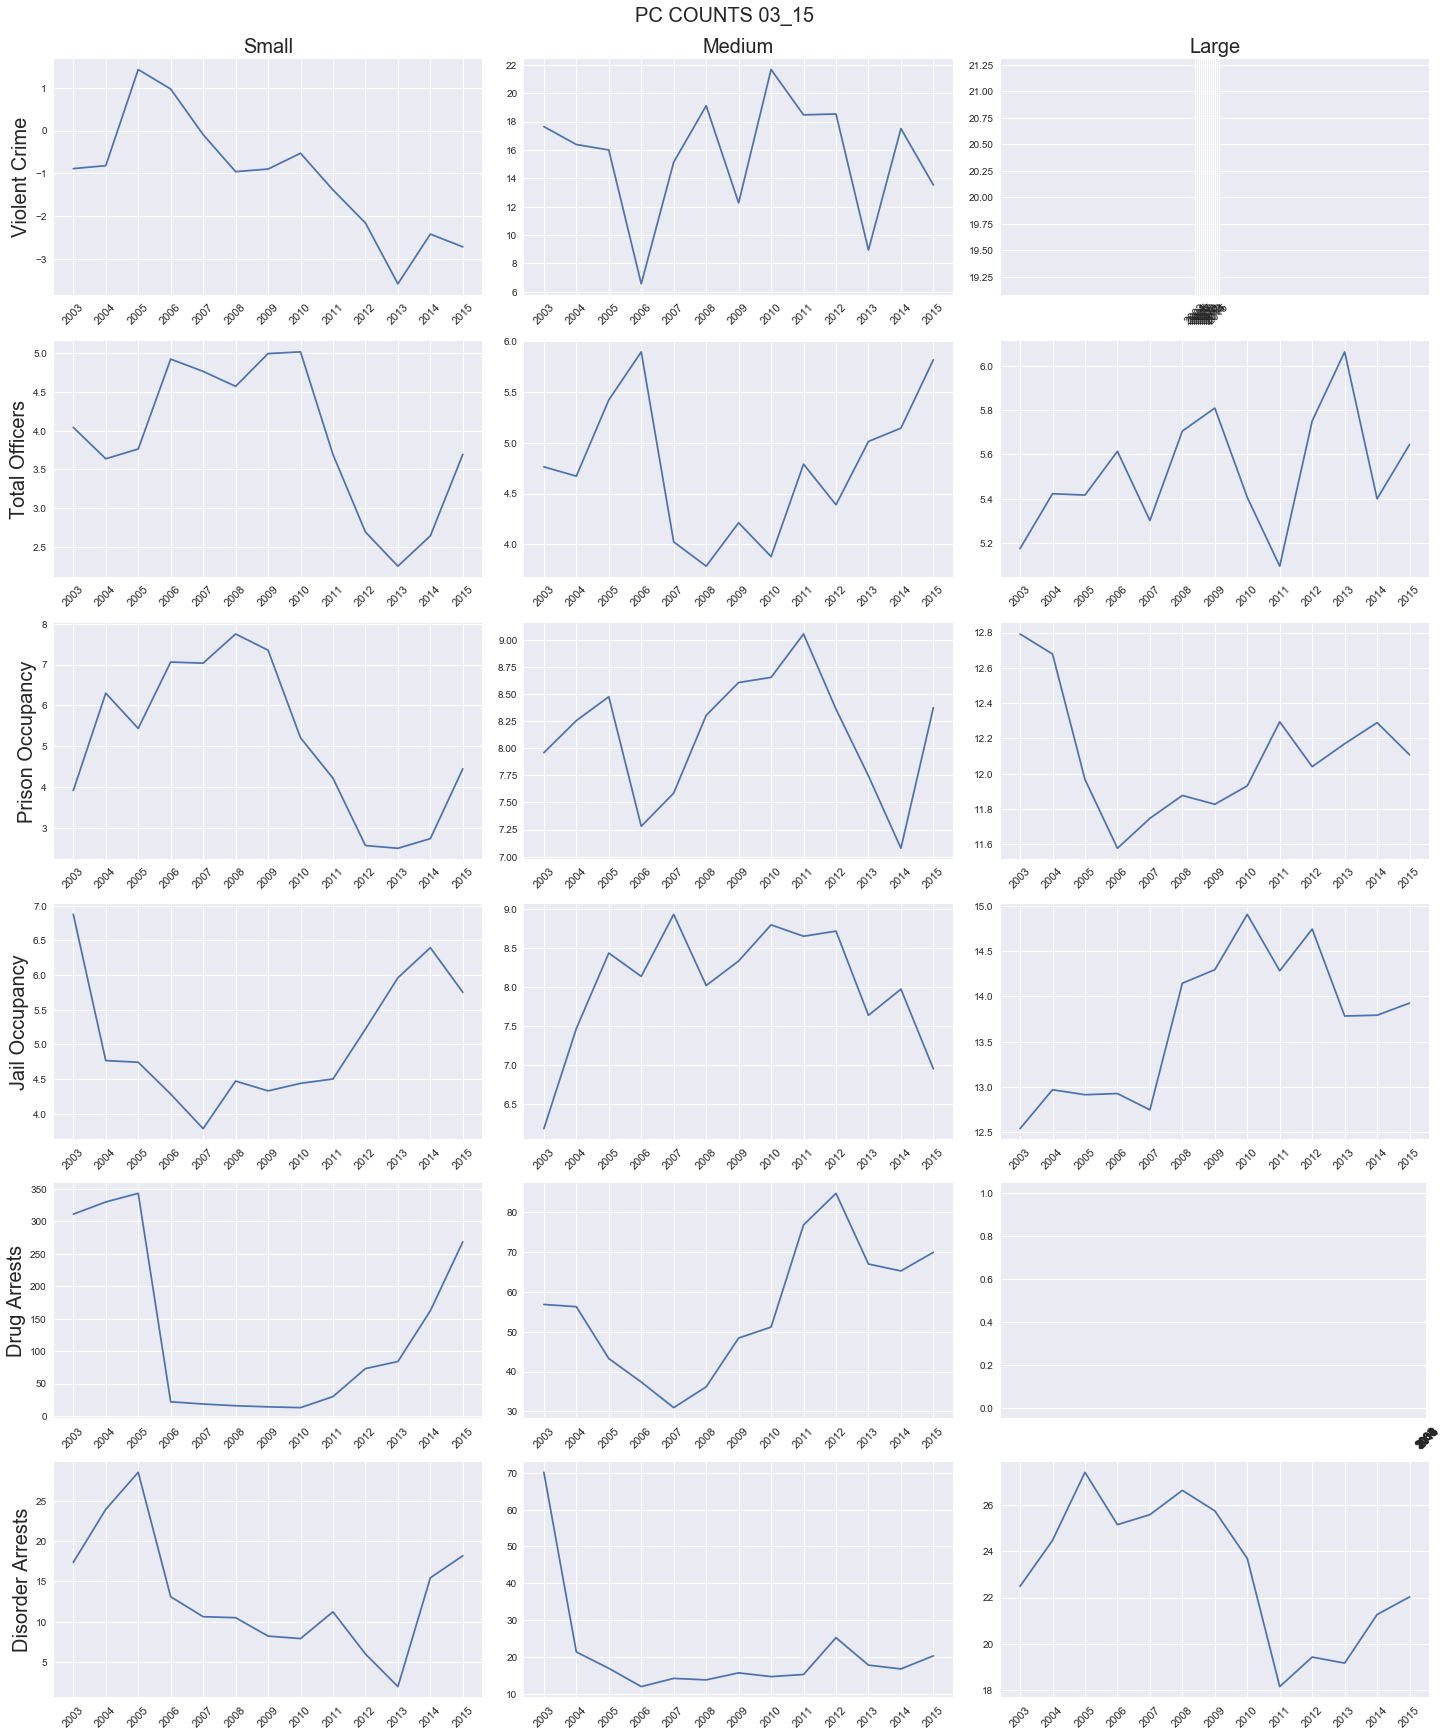

In [46]:
mult_var_plots_mult_rows(req_dfs=[large_03_15, medium_03_15, small_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = vars_counts_pc,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['Small', 'Medium', 'Large'],
                                               fig_title = 'PC COUNTS 03_15')

In [165]:
### to get dependent var plot on 1st row and reqd ind vars plots one below other next for 1 df at a time
## plot all the vars for 1 df at once. Then move on to 2nd df

def single_df_mult_var_plots_mult_rows(req_dfs, groupby_var, x_var, y_var_list, x_label, 
                            y_label_lst, plt_titles, fig_title, weighted=None, weights_var=None, xtick_years=xtick_years):
    fig, axs = plt.subplots(nrows=len(y_var_list), ncols=len(req_dfs), figsize=(20, 24), constrained_layout=True)
            
    for df in req_dfs:        
        for j in range(len(req_dfs)):
            for i in range(len(y_var_list)):
                y_var = y_var_list[i]
                axs[i].plot(x_var, df.groupby(f'{groupby_var}')[f'{y_var}'].mean())
                axs[i].set_ylabel(y_label_lst[i], fontsize=20) 
        
    fig.suptitle(fig_title, fontsize=20)

#### pc for all agencies together

In [197]:
all_90_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_pc/final_main_gte_10k_core_counts_pc.csv')
all_90_02 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_90_02_pc/final_main_gte_10k_core_counts_1990_2002_pc.csv')
all_03_15 = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_core_03_15_pc/final_main_gte_10k_core_counts_2003_2015_pc.csv')

In [198]:
vars_rates_pc = ['pc_violent_crime_rate', 'pc_total_officers_rate', 'pc_prison_occupancy_count_rate', 'pc_jail_occupancy_count_rate',
               'pc_drug_tot_arrests_rate', 'pc_disorder_arrests_tot_index_rate']
vars_counts_pc = ['pc_violent_crime', 'pc_total_officers', 'pc_prison_occupancy_count', 'pc_jail_occupancy_count', 'pc_drug_tot_arrests','pc_disorder_arrests_tot_index']

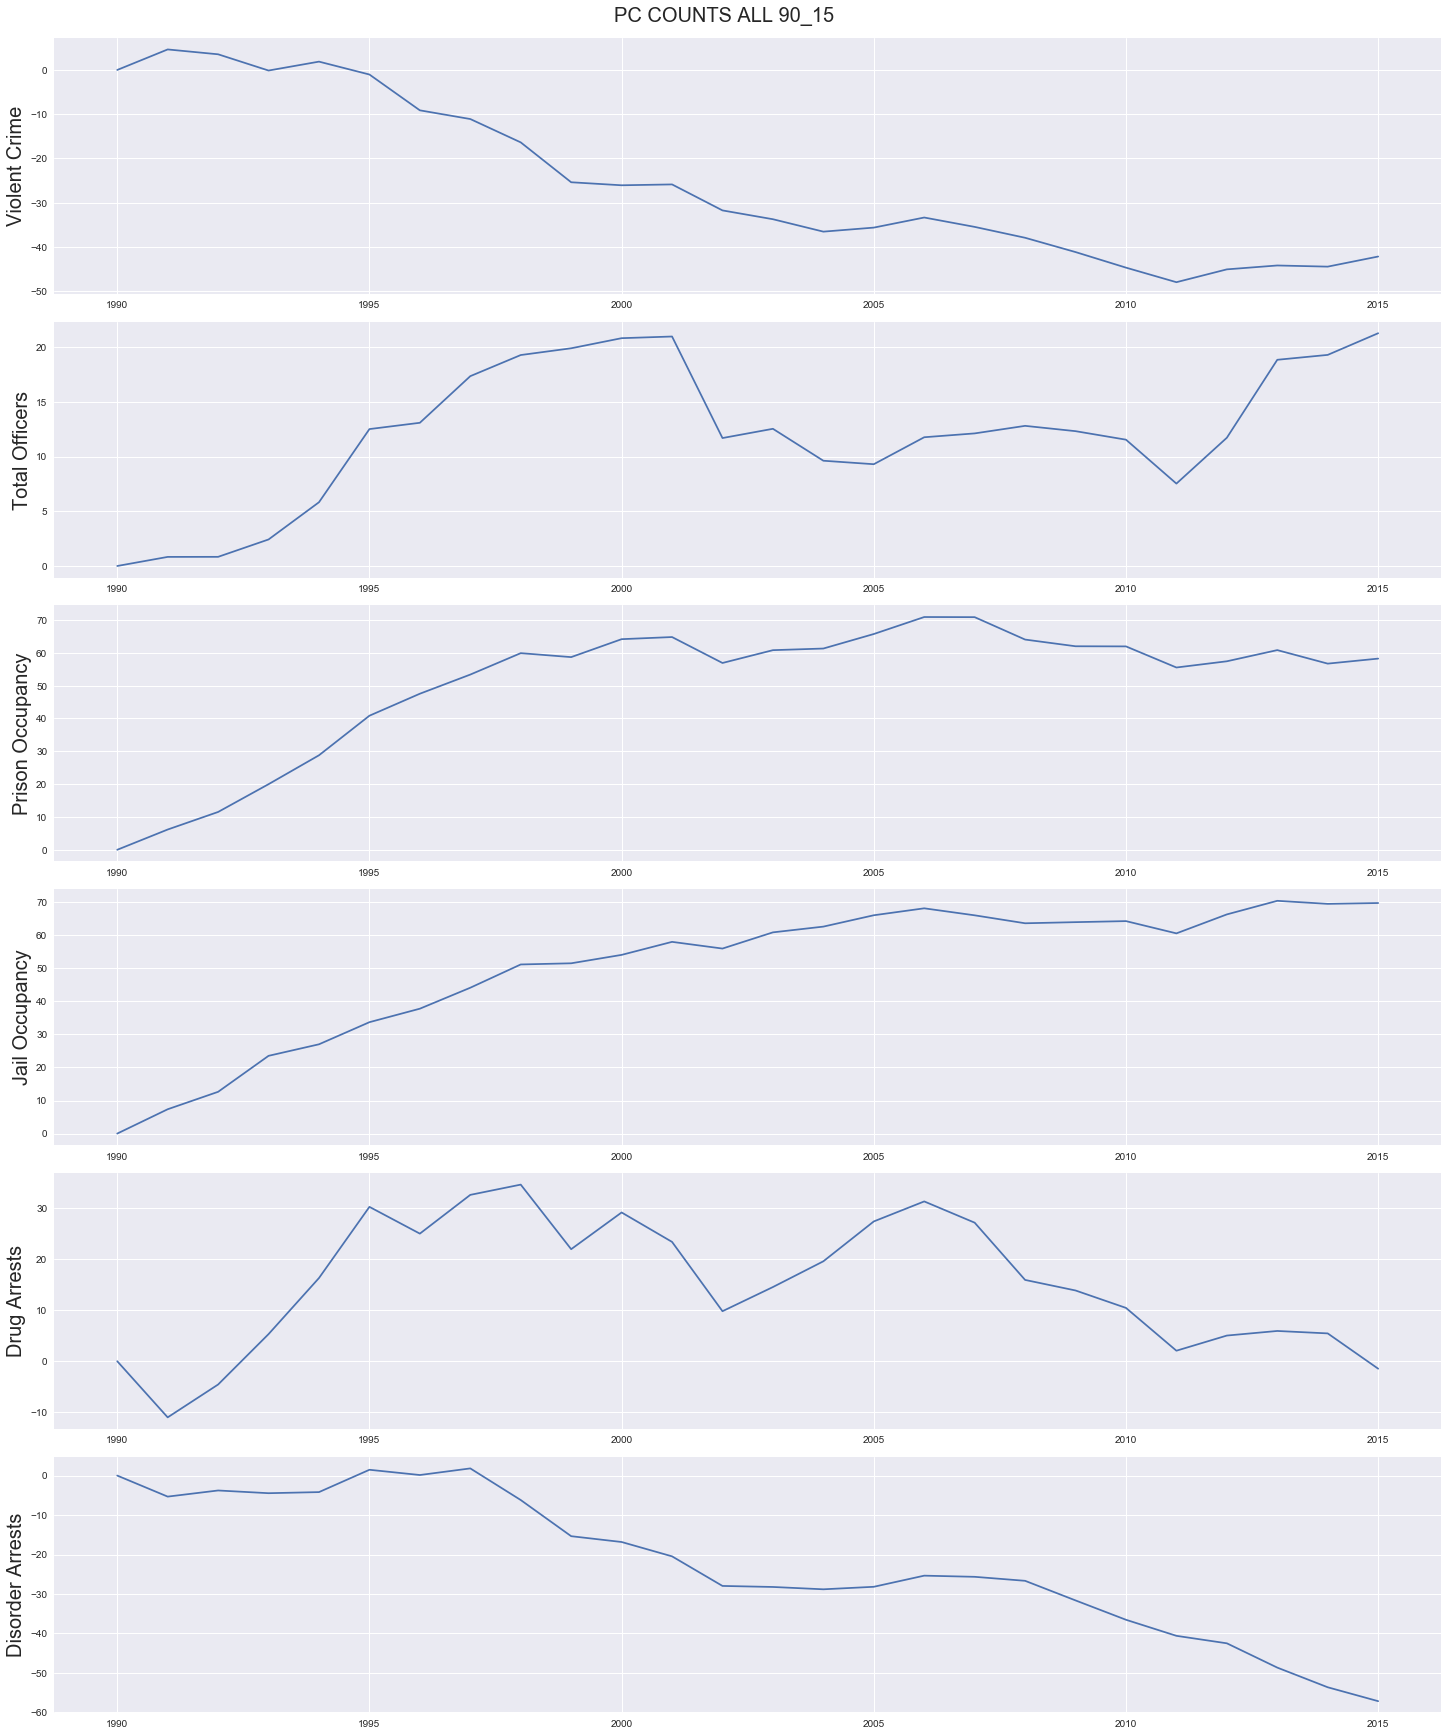

In [199]:
single_df_mult_var_plots_mult_rows(req_dfs=[all_90_15],
                                               groupby_var='YEAR',
                                               y_var_list = vars_counts_pc,
                                               x_var = Years,
                                               xtick_years = Years,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['All 90-15'],
                                               fig_title = 'PC COUNTS ALL 90_15')

#### pc for 90-02 agencies together

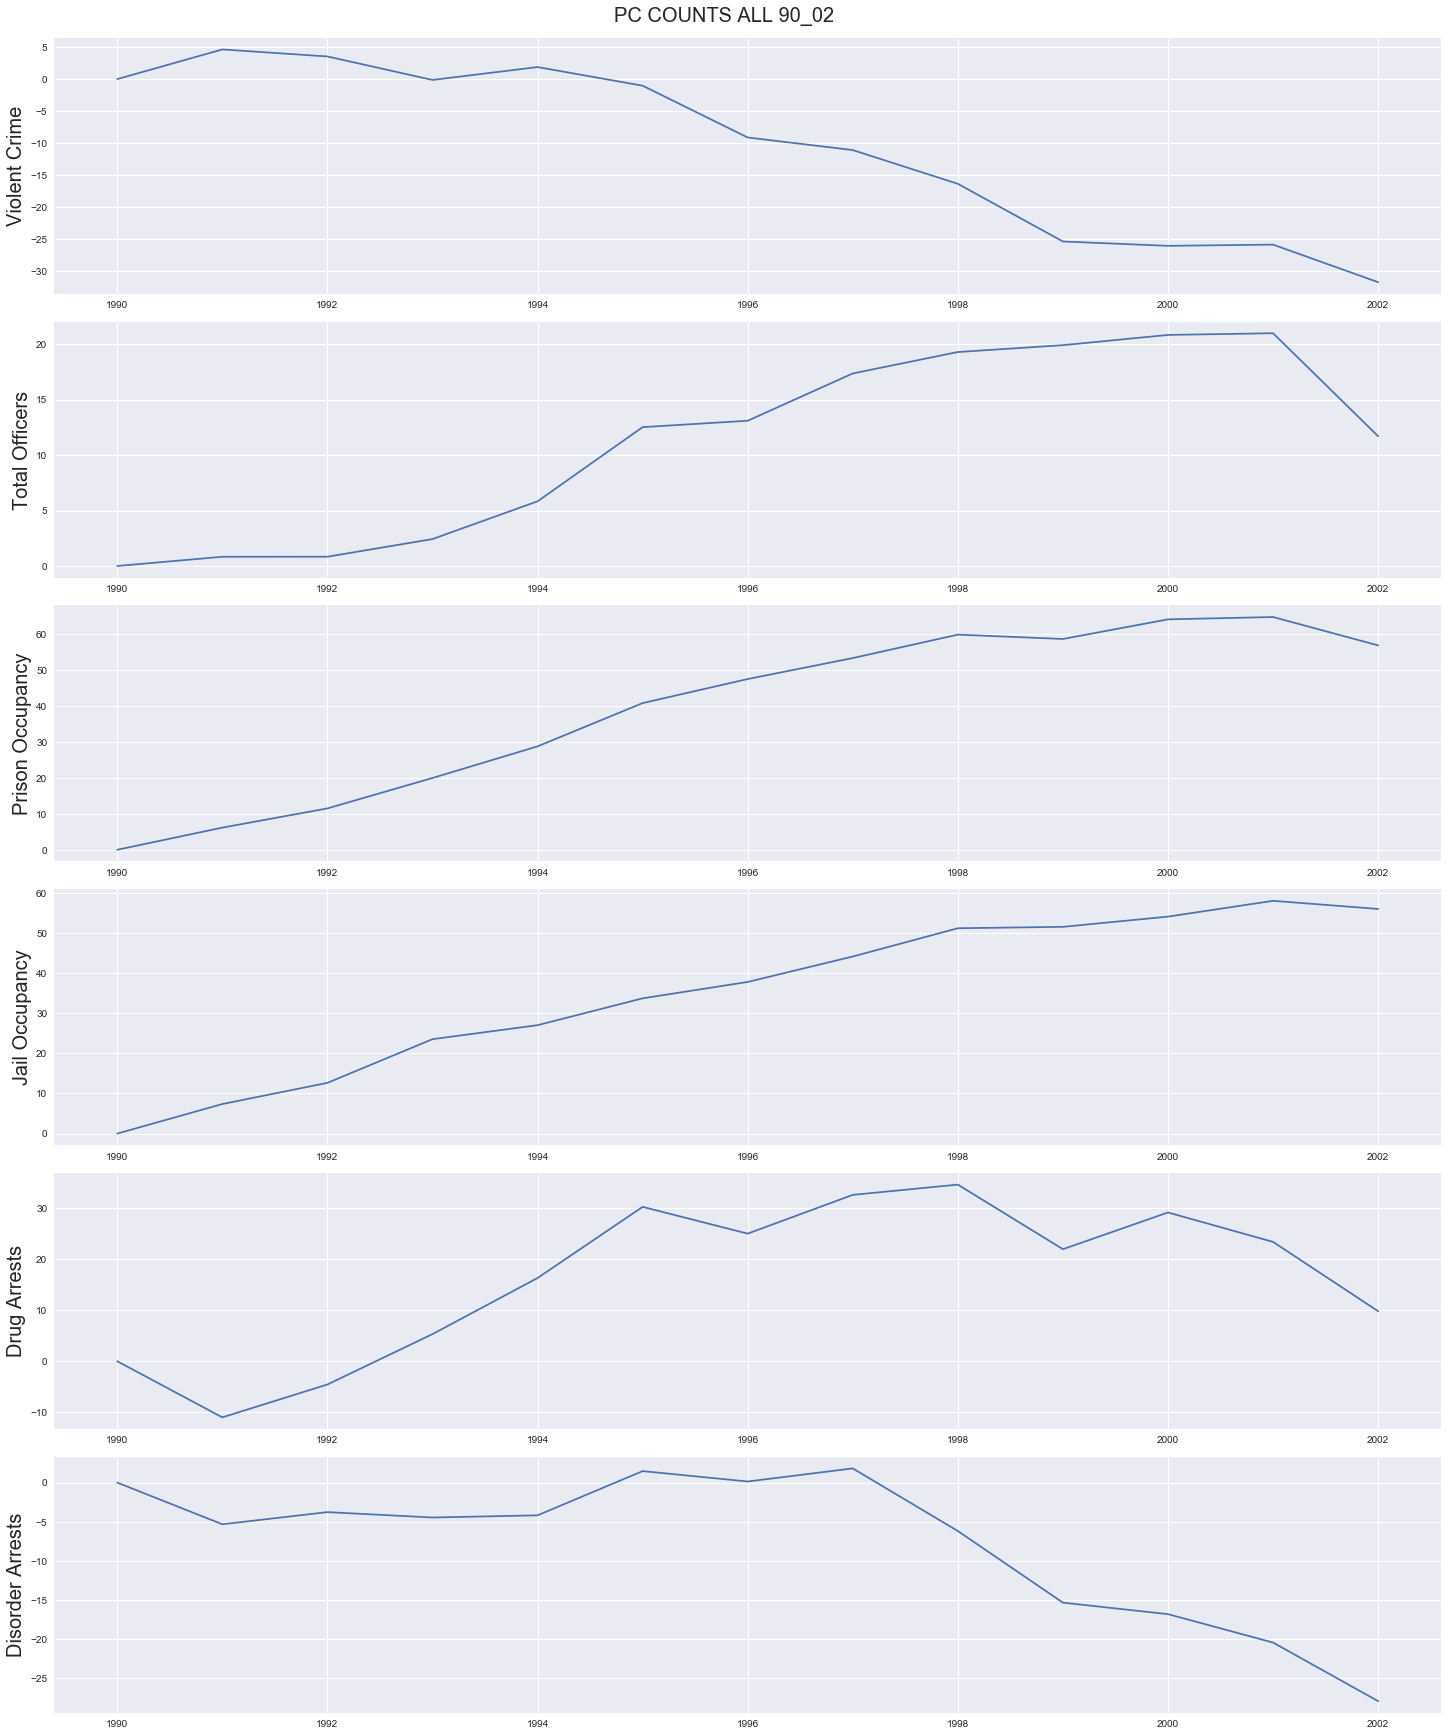

In [200]:
single_df_mult_var_plots_mult_rows(req_dfs=[all_90_02],
                                               groupby_var='YEAR',
                                               y_var_list = vars_counts_pc,
                                               x_var = Years_90_02,
                                               xtick_years = Years_90_02,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['All 90-02'],
                                               fig_title = 'PC COUNTS ALL 90_02')

#### pc for 03-15 agencies together

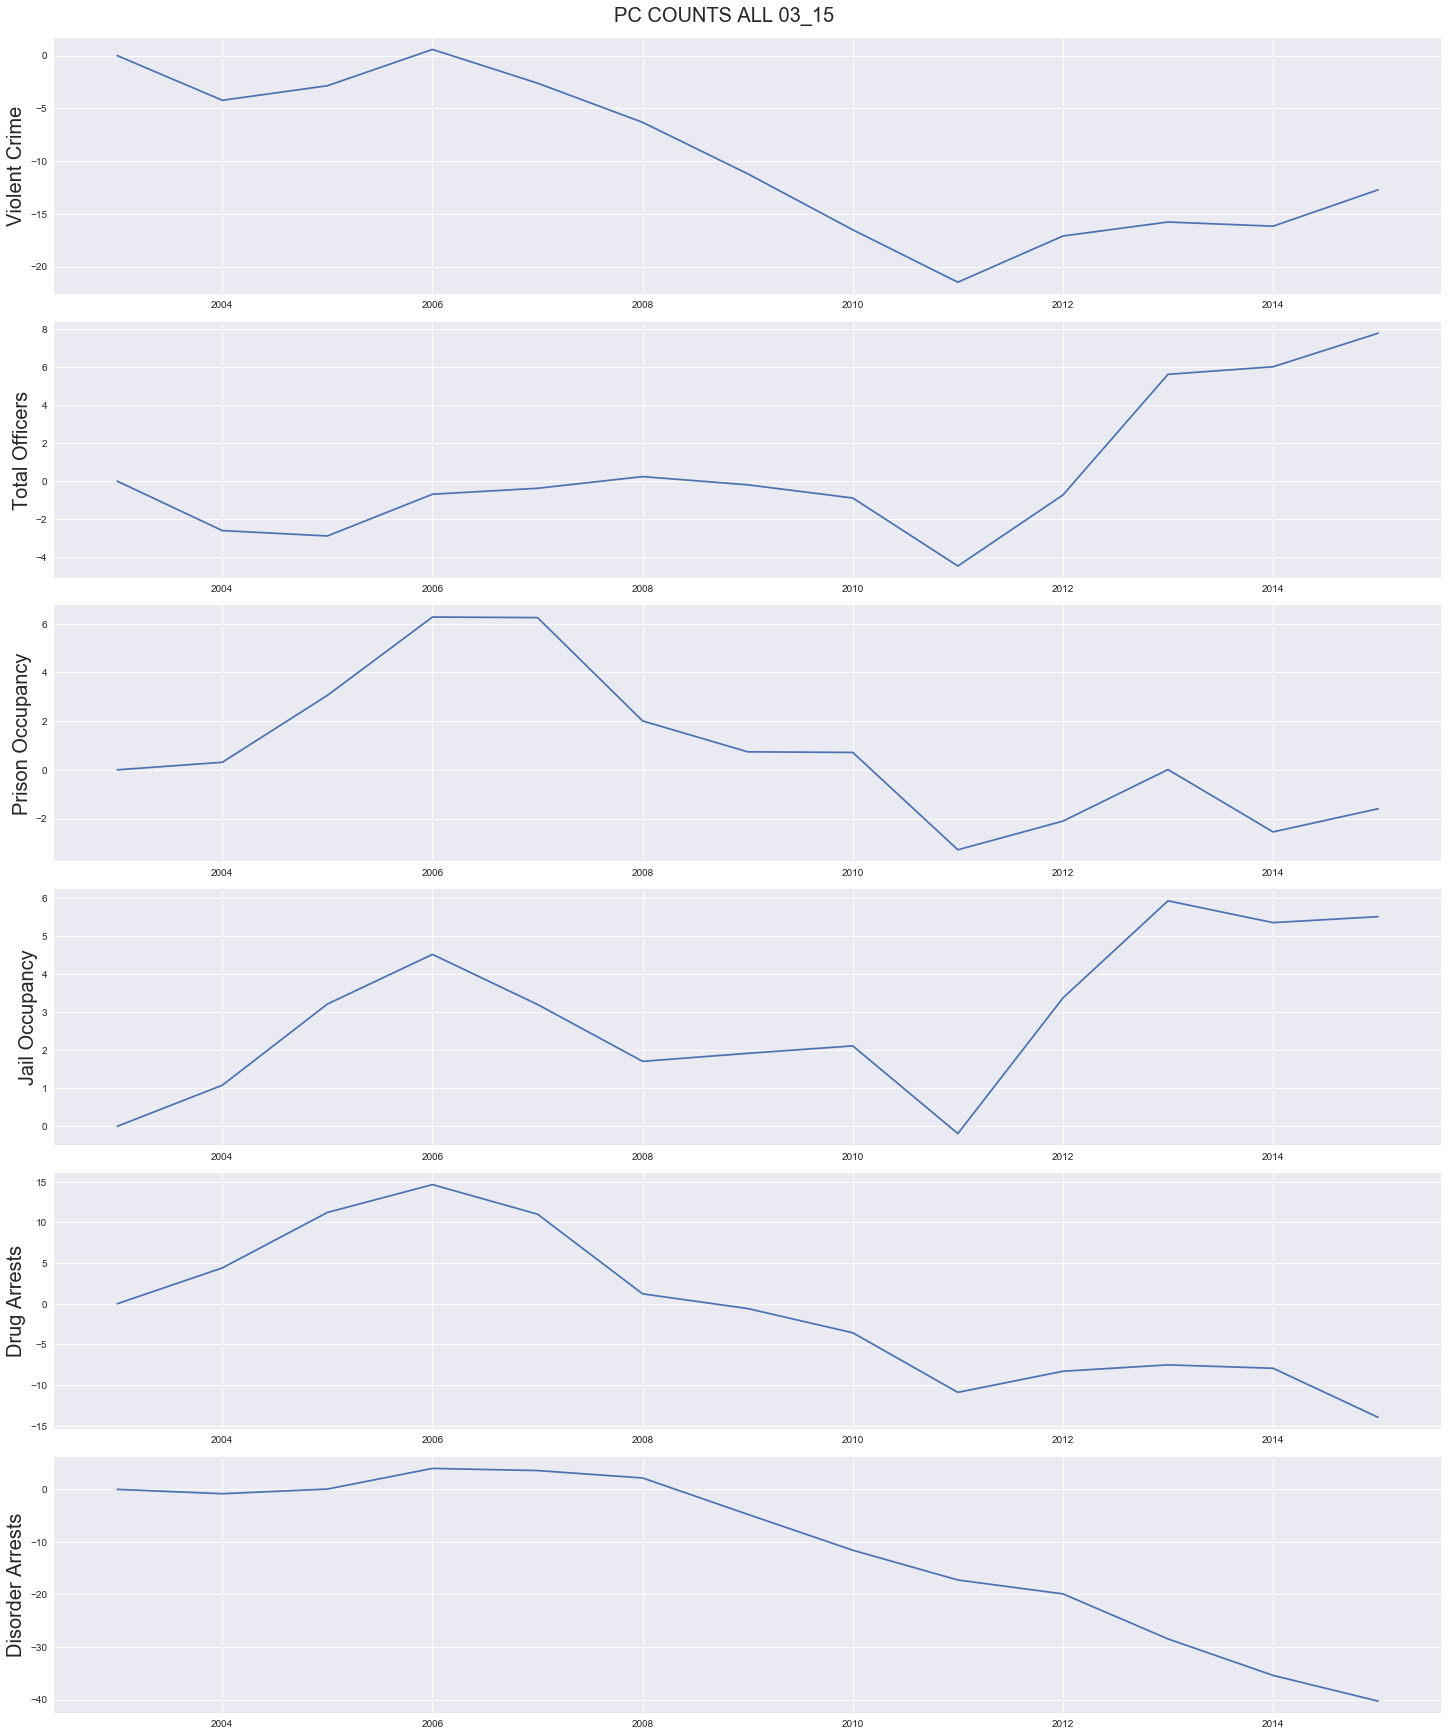

In [201]:
single_df_mult_var_plots_mult_rows(req_dfs=[all_03_15],
                                               groupby_var='YEAR',
                                               y_var_list = vars_counts_pc,
                                               x_var = Years_03_15,
                                               xtick_years = Years_03_15,
                                               x_label = 'Years',
                                               y_label_lst = ['Violent Crime', 'Total Officers', 'Prison Occupancy', 'Jail Occupancy', 
                                                              'Drug Arrests', 'Disorder Arrests'],
                                               plt_titles = ['All 03-15'],
                                               fig_title = 'PC COUNTS ALL 03_15')